In [1]:
#importing required libraries
import numpy as np
import pandas as pd
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# importing libraries to Scale for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# To eliminate the scientific notation from numpy arrays
np.set_printoptions(suppress=True)


In [2]:
start_Date=datetime(2018, 10,1)
end_Date=datetime(2022, 10, 5)

In [3]:
# Fetching the data
Load_data=pd.read_csv('ADANIENT.NS.csv')
print(Load_data.head())
Load_data.shape

         Date        Open        High        Low       Close   Adj Close  \
0  2018-03-01  110.914642  112.631081  81.026810   85.222549   83.989594   
1  2018-04-01   85.712959   99.226715  80.154968   89.891129   88.590645   
2  2018-05-01   89.891129   90.789398  74.203491   77.636162   76.512970   
3  2018-06-01   77.636162   88.030426  69.744225   72.599442   71.549110   
4  2018-07-01   72.374870  132.655182  64.707497  125.404861  123.590576   

      Volume  
0  420346169  
1  286283745  
2  192412252  
3  204014415  
4  687765190  


(61, 7)

<AxesSubplot:xlabel='Trade_Date'>

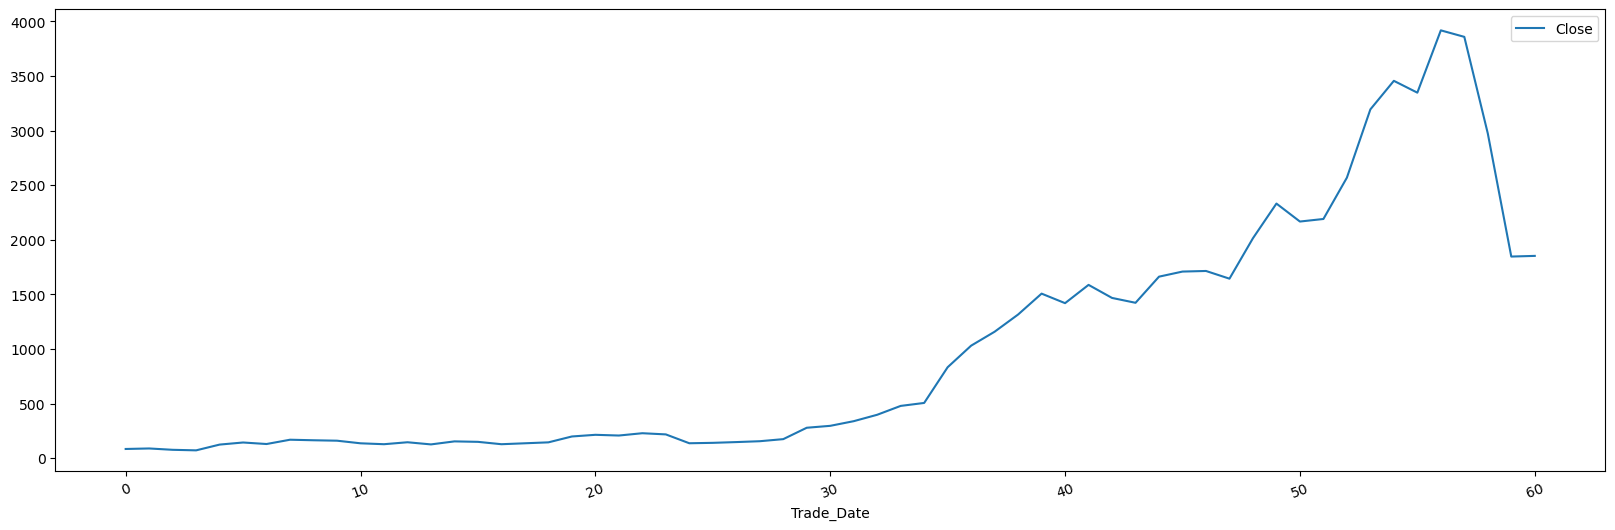

In [4]:
# Create another column as a Trade_date
Load_data['Trade_Date']=Load_data.index

# Plotting graph of Stock price
%matplotlib inline
Load_data.plot(x='Trade_Date', y='Close', kind='line', figsize=(20,6), rot=20)

In [5]:
# getting the nearest prices for each day
All_Data=Load_data[['Close']].values
print(All_Data[0:6])


# Selecting between Standardization or normalization

scaler=MinMaxScaler()

Datascaler = scaler.fit(All_Data)
X=Datascaler.transform(All_Data)

print('\n____After Normalizing data______')
X[0:6]

[[ 85.222549]
 [ 89.891129]
 [ 77.636162]
 [ 72.599442]
 [125.404861]
 [144.525177]]

____After Normalizing data______


array([[0.00328274],
       [0.00449684],
       [0.00130984],
       [0.        ],
       [0.01373246],
       [0.01870484]])

In [6]:
# dividing data into two samples
samples_X = list()
samples_Y = list()

No_rows = len(X)

 # next day's Price Prediction  depends on last how many prices of past day
time_steps=10 

# Iterate by the values for making combinations
for i in range(time_steps , No_rows , 1):
    sample_x = X[i-time_steps:i]
    sample_y = X[i]
    samples_X.append(sample_x)
    samples_Y.append(sample_y)

################################################
# Reshaping the Input as a 3D (number of samples, Time Steps, Features) as LSTM ONLY takes 3D inputs
data_x=np.array(samples_X)
data_x=data_x.reshape(data_x.shape[0],data_x.shape[1], 1)
print('\n Reshaped Input Data ')
print(data_x.shape)

#  y is a single column so reshaping is not required
data_y=np.array(samples_Y)
data_y=data_y.reshape(data_y.shape[0], 1)
print('\n Reshaped Output Data  ')
print(data_y.shape)


 Reshaped Input Data 
(51, 10, 1)

 Reshaped Output Data  
(51, 1)


In [7]:
# Selecting number of records for testing  
record_test=5

# dividing  the data into training and testing sets
train_x=data_x[:-record_test]
test_x=data_x[-record_test:]
train_y=data_y[:-record_test]
test_y=data_y[-record_test:]

############################################

#  the shape of train and test datasets
print('\n _____Data shape of training____' )
print(train_x.shape)
print(train_y.shape)
print('\n______Data shape of testing_____' )
print(test_x.shape)
print(test_y.shape)


 _____Data shape of training____
(46, 10, 1)
(46, 1)

______Data shape of testing_____
(5, 10, 1)
(5, 1)


In [8]:
# Visualizationof the input and output  given to the LSTM model
for in_, out_ in zip(train_x[0:2], train_y[0:2]):
    print(in_,'--', out_)

[[0.00328274]
 [0.00449684]
 [0.00130984]
 [0.        ]
 [0.01373246]
 [0.01870484]
 [0.01508349]
 [0.02532977]
 [0.02402948]
 [0.02298925]] -- [0.01678687]
[[0.00449684]
 [0.00130984]
 [0.        ]
 [0.01373246]
 [0.01870484]
 [0.01508349]
 [0.02532977]
 [0.02402948]
 [0.02298925]
 [0.01678687]] -- [0.01462839]


In [9]:
# Defining Input shapes for LSTM
Time_steps=train_x.shape[1]
total_features=train_x.shape[2]
print("Total Time_steps:", Time_steps)
print("Total  Features:", total_features)

Total Time_steps: 10
Total  Features: 1


In [39]:
#building models

models = Sequential()
models.add(Dense(units=50, activation='relu'))
models.add(Dense(units=100, activation='relu'))
models.add(Dense(units=1))

# Compiling the RNN
models.compile(optimizer = 'adam', loss = 'mean_squared_error')

import time
# Calculating the time taken by the models to train
Start_Time=time.time()

# Fitting the RNN to the Training set
models.fit(train_x, train_y, batch_size = 5, epochs = 100)

End_Time=time.time()
print("## Total Time Taken: ", round((End_Time-Start_Time)/60), 'Minutes ##')

Epoch 1/100
10/10 [==============================] - 7s 17ms/step - loss: 0.0066
Epoch 2/100
10/10 [==============================] - 0s 16ms/step - loss: 0.0064
Epoch 3/100
10/10 [==============================] - 0s 16ms/step - loss: 0.0063
Epoch 4/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0060
Epoch 5/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0059
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0062
Epoch 7/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0059
Epoch 8/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0058
Epoch 9/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0059
Epoch 10/100
10/10 [==============================] - 0s 16ms/step - loss: 0.0058
Epoch 11/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0060
Epoch 12/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0057
Epoch 13/100
10/10 [=====

1/1 [==============================] - 1s 798ms/step
Accuracy: 91.67044529911502


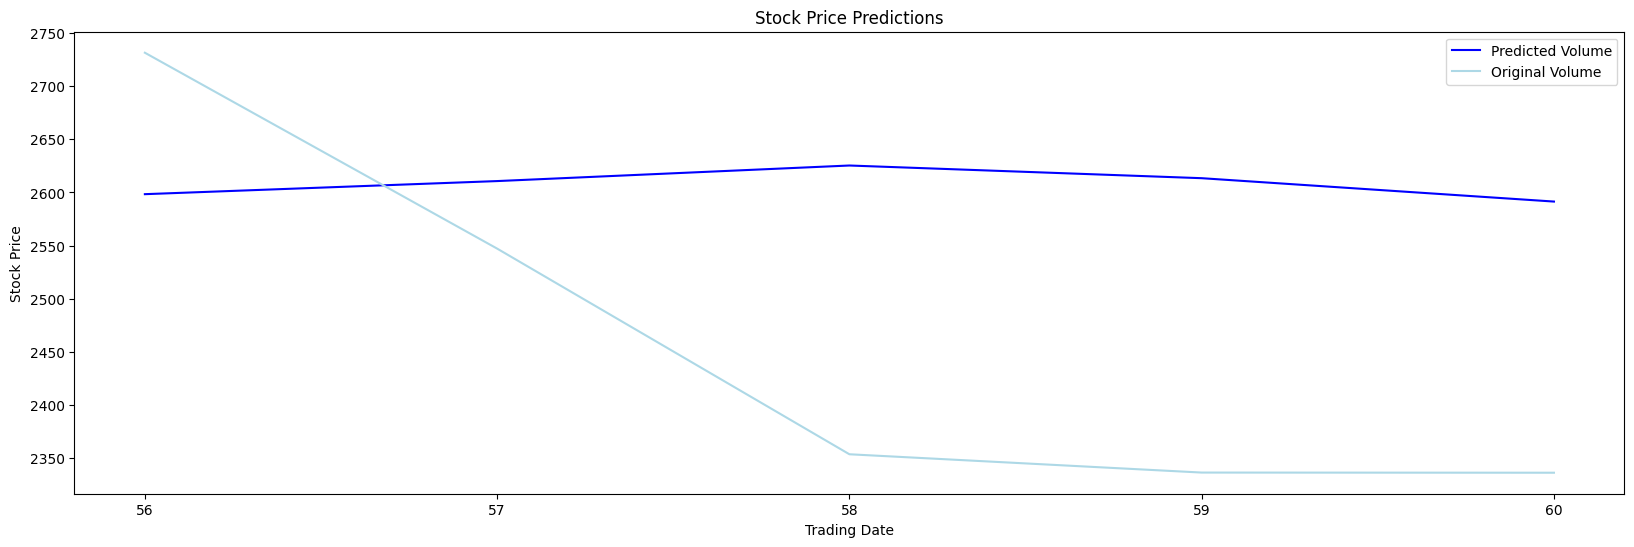

In [40]:
#  predictions on test data
pre_price = models.predict(test_x)
#pre_price = Datascaler.inverse_transform(pre_price)

# Reshape pre_price to have two dimensions
pre_price = pre_price.reshape(-1, 1)

# Apply inverse_transform
pre_price = Datascaler.inverse_transform(pre_price)

# Getting the original price values for testing data
origin=test_y
origin=Datascaler.inverse_transform(test_y)


# Apply accuracy formula
accuracy = 100 - (100*(abs(origin-pre_price)/origin)).mean()

# Print accuracy
print('Accuracy:', accuracy)

# Visualising the results
import matplotlib.pyplot as plt

plt.plot(pre_price, color = 'blue', label = 'Predicted Volume')
plt.plot(origin, color = 'lightblue', label = 'Original Volume')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(record_test), Load_data.tail(record_test)['Trade_Date'])
plt.ylabel('Stock Price')

plt.legend()
figure=plt.gcf()
figure.set_figwidth(20)
figure.set_figheight(6)
plt.show()

1/1 [==============================] - 0s 49ms/step


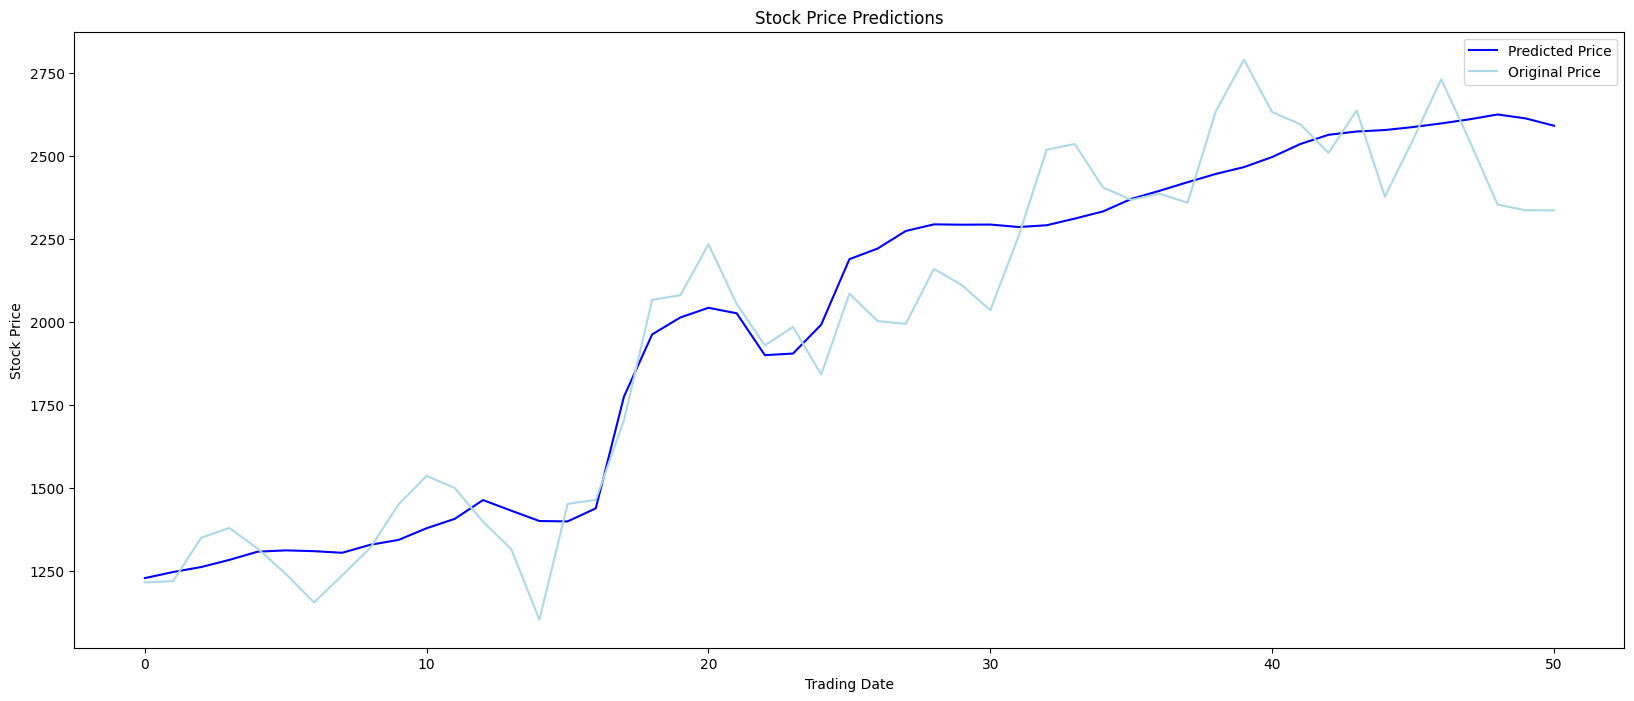

In [41]:
# Generating predictions on full data
train_pred=Datascaler.inverse_transform(models.predict(train_x))
test_pred=Datascaler.inverse_transform(models.predict(test_y))

fulldata_pred=np.append(train_pred, test_pred)
fulldata_orig=FullData[TimeSteps:]

# plotting the full data
plt.plot(fulldata_pred, color = 'blue', label = 'Predicted Price')
plt.plot(fulldata_orig , color = 'lightblue', label = 'Original Price')


plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
figure=plt.gcf()
figure.set_figwidth(20)
figure.set_figheight(8)
plt.show()